# Create a baseline model

In [1]:
import pandas as pd

from data import load_data_selected_features

train_data, augmented_train_data, test_data = load_data_selected_features()

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150996 entries, p01_0 to p12_25298
Columns: 507 entries, p_num to bg+1:00
dtypes: float64(433), object(74)
memory usage: 585.2+ MB


In [3]:
augmented_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174940 entries, p01_test_12 to p24_test_95514
Columns: 507 entries, p_num to bg+1:00
dtypes: float64(433), object(74)
memory usage: 682.1+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3644 entries, p01_8459 to p24_260
Columns: 506 entries, p_num to activity-0:00
dtypes: float64(432), object(74)
memory usage: 14.2+ MB


# Prepare the data

In [5]:
from pipelines_selected_features import pipeline

all_train_data = pd.concat([train_data, augmented_train_data], axis=0)
all_train_data_transformed = pipeline.fit_transform(all_train_data)
test_data_transformed = pipeline.transform(test_data)

train_data_transformed = all_train_data_transformed[:len(train_data)]
augmented_train_data_transformed = all_train_data_transformed[len(train_data):]

X_train = train_data_transformed.drop(columns=['bg+1:00'])
y_train = train_data_transformed['bg+1:00']

X_augmented_train = augmented_train_data_transformed.drop(columns=['bg+1:00'])
y_augmented_train = augmented_train_data_transformed['bg+1:00']

X_test = test_data_transformed.copy()

## Predict for validation data and check results

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LassoLarsIC, Ridge

hgb_base_model = HistGradientBoostingRegressor(max_iter=200, max_depth=5, learning_rate=0.1)
lasso_lars_ic_base_model = LassoLarsIC(criterion='bic', max_iter=10000)
knn_base_model = KNeighborsRegressor(n_neighbors=5)
xgb_base_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=500, max_depth=5, learning_rate=0.1)

estimators = [
    ('hgb', hgb_base_model),
    ('lasso_lars_ic', lasso_lars_ic_base_model),
    ('knn', knn_base_model),
    ('xgb', xgb_base_model),
]

baseline_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=0.1), n_jobs=-1, verbose=2)

## Performance calculations with Cross Validation

15:43:31 - Start training
15:43:31 - Calculate performance for hgb
15:43:31 - Selected splitter: ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None)
15:43:31 - Split 1 - Model: hgb
15:43:31 - Fitting the model
15:43:43 - Predicting
15:43:43 - Calculating scores
15:43:43 - R^2: 0.5860264807221865, RMSE: 2.0549939073295644, MAE: 1.5235347576632419, MSE: 4.222999959161631
15:43:43 - Split 2 - Model: hgb
15:43:43 - Fitting the model
15:43:57 - Predicting
15:43:57 - Calculating scores
15:43:57 - R^2: 0.5893573058916899, RMSE: 2.069515170453915, MAE: 1.5276556230710667, MSE: 4.282893040738896
15:43:57 - Split 3 - Model: hgb
15:43:57 - Fitting the model
15:44:18 - Predicting
15:44:18 - Calculating scores
15:44:18 - R^2: 0.5879890532893066, RMSE: 2.069317885492501, MAE: 1.532886108976758, MSE: 4.282076511219156
15:44:18 - Split 4 - Model: hgb
15:44:18 - Fitting the model
15:44:26 - Predicting
15:44:26 - Calculating scores
15:44:26 - R^2: 0.5866203665111559, RMSE: 2.070094

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.0s remaining:   24.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   44.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.6s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


15:48:12 - Predicting
15:48:22 - Calculating scores
15:48:22 - R^2: 0.6331028377435804, RMSE: 1.9346233904408219, MAE: 1.4172121057619504, MSE: 3.7427676628407407
15:48:22 - Split 2 - Model: stacking_regressor
15:48:22 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.0s remaining:   27.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   45.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


15:50:11 - Predicting
15:50:22 - Calculating scores
15:50:22 - R^2: 0.6355123980888295, RMSE: 1.9497455787628266, MAE: 1.4222278118364167, MSE: 3.8015078219051897
15:50:22 - Split 3 - Model: stacking_regressor
15:50:22 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.6s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.8s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.2s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished


15:52:13 - Predicting
15:52:23 - Calculating scores
15:52:23 - R^2: 0.6336594919751626, RMSE: 1.9512607362192407, MAE: 1.4284701101250268, MSE: 3.807418460710853
15:52:23 - Split 4 - Model: stacking_regressor
15:52:23 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.0s remaining:   36.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   59.1s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.5s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


15:54:18 - Predicting
15:54:29 - Calculating scores
15:54:29 - R^2: 0.6324168175837663, RMSE: 1.9520614659171305, MAE: 1.4205269413630734, MSE: 3.8105439667185363
15:54:29 - Split 5 - Model: stacking_regressor
15:54:29 - Fitting the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.1s remaining:   24.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   51.3s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.1s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.5s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.7s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


15:56:25 - Predicting
15:56:35 - Calculating scores
15:56:35 - R^2: 0.6367809891364016, RMSE: 1.9379679101620324, MAE: 1.4235735645419845, MSE: 3.7557196208177954
15:56:35 - Training finished
Final estimator RMSE: 1.9451318163004103
Final estimator R2: 0.6342945069055481
Final estimator MSE: 3.7835915065986234
Final estimator MAE: 1.4224021067256902


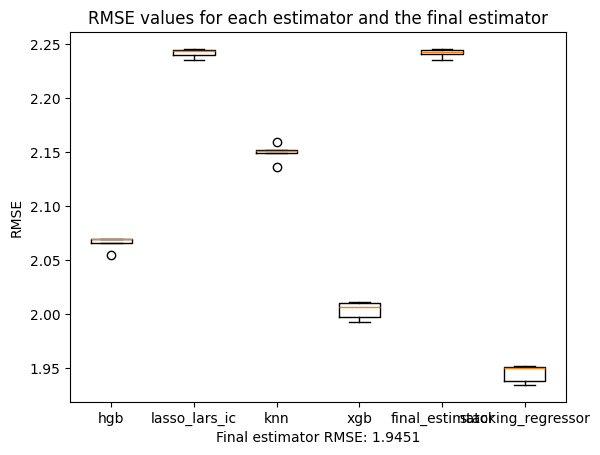

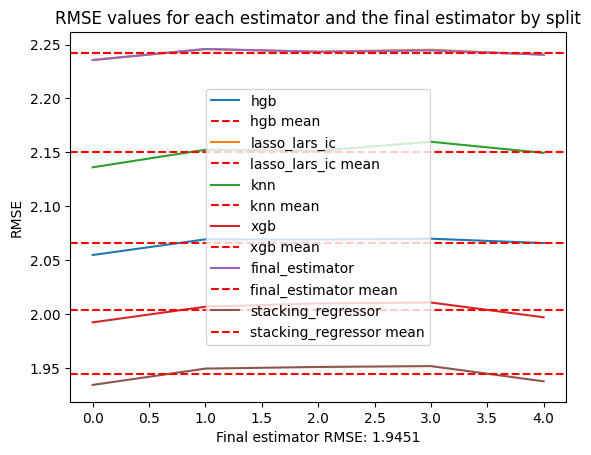

In [7]:
from datetime import datetime
import os
from model_performance_calculations import calculate_stacking_regressor_performance, get_rmse_boxplot_chart, get_rmse_line_chart, save_performances, save_model

date_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
model_name = f'{date_time}-baseline-model'

save_model(baseline_model, os.path.join('models', f'{model_name}.pkl'))

performances = calculate_stacking_regressor_performance(baseline_model, X_train, y_train, X_augmented_train, y_augmented_train)
save_performances(performances, os.path.join('models', f'{model_name}-performances.json'))

get_rmse_boxplot_chart(performances).show()
get_rmse_line_chart(performances).show()

## Train the model with all data and predict for test data

In [8]:
import numpy as np

baseline_model.fit(pd.concat([X_train, X_augmented_train]), pd.concat([y_train, y_augmented_train]))
y_pred = baseline_model.predict(X_test)

# do a sanity check, we should not have negative values
if np.sum(y_pred < 0) > 0:
    print(f'Number of negative values: {np.sum(y_pred < 0)}')
    bg_min_train = np.min(y_train)
    print(f'Min value: {np.min(y_pred)}')
    y_pred = y_pred.apply(lambda x: bg_min_train if x < 0 else x)

test_data['bg+1:00'] = y_pred
test_data.head()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.2s remaining:   27.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   49.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.2s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.160226
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk,5.645409
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.865402
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.795289
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.663068


## Save the submission

In [9]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')
submission

,bg+1:00
id,
p01_8459,9.160226
p01_8460,5.645409
p01_8461,7.865402
p01_8462,10.795289
p01_8463,6.663068
...,...
p24_256,6.091722
p24_257,10.232725
p24_258,6.419841
